In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import os
import yaml
import numpy as np

In [2]:
from distgen import Generator

In [3]:
input_yaml = """
n_particle: 100000
start: 
  type: free
random:
  type: hammersley
total_charge:
  units: pC
  value: 10
r_dist:
  max_r:
    units: mm
    value: 1
  type: radial_uniform
p_dist:
  sigma_p:
    value: 1
    units: eV/c
  avg_p: 
    value: 100
    units: eV/c
  type: gaussian
"""

In [4]:
gen = Generator(input_yaml, verbose=True)

In [5]:
P = gen.run()

Distribution format: None
Output file: None

Creating beam distribution....
   Beam starting from: free
   Total charge: 10 pC.
   Number of macroparticles: 100000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 1 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   p distribution: Gaussian
      avg_p = 100 eV/c, sigma_p = 1.000 eV/c
   azimuthal angle distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   polar angle distribution: uniform phi
      min_phi = 0 rad, max_phi = 3.14159 rad
   Shifting avg_x = -4.85224E-08 mm -> 0 mm
   Scaling sigma_x = 0.499991 mm -> 0.5 mm
   Shifting avg_y = 1.44675E-06 mm -> 0 mm
   Scaling sigma_y = 0.49999 mm -> 0.5 mm
   Shifting avg_px = -3.3074E-05 eV/c -> -6.12323E-15 eV/c
   Scaling sigma_px = 57.7382 eV/c -> 57.7379 eV/c
   Shifting avg_py = 1.54491E-06 eV/c -> 0 eV/c
   Scaling sigma_py = 57.7382 eV/c -> 57.7379 eV/c
   Shiftin

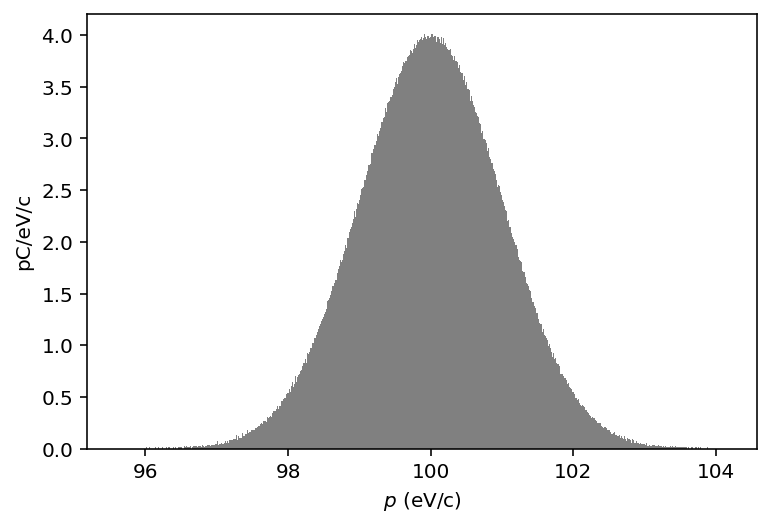

In [6]:
P.plot('p')

In [7]:
P.plot('x', 'px')

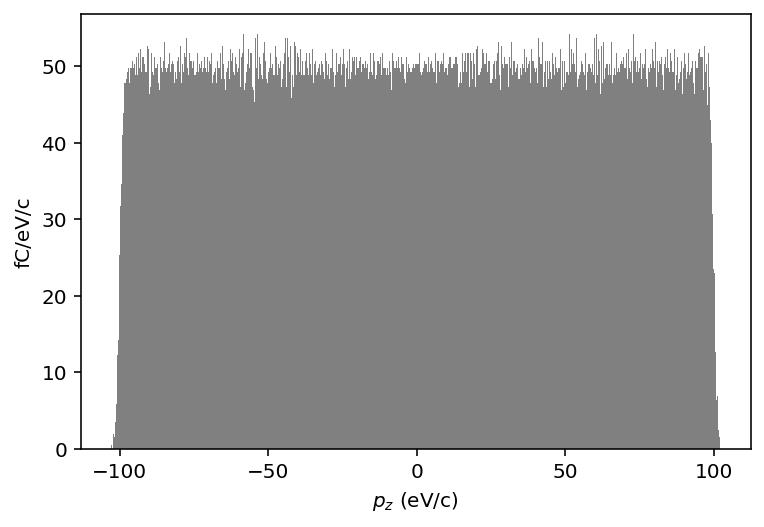

In [8]:
P.plot('pz')

In [9]:
P.plot('px')

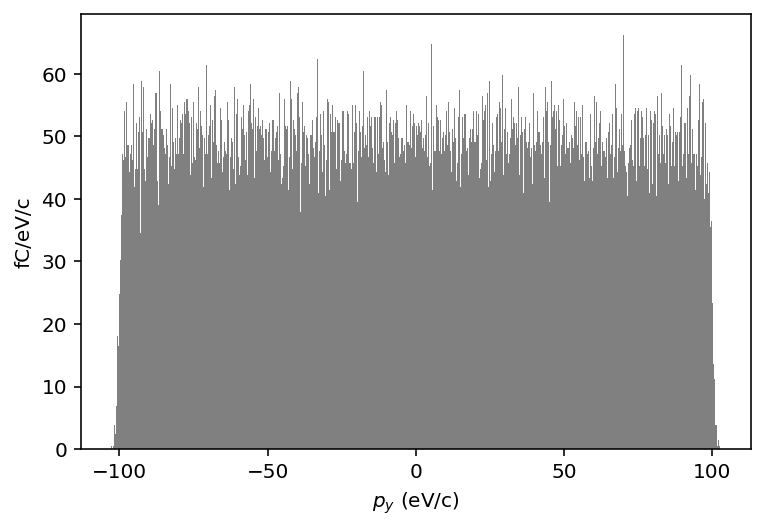

In [10]:
P.plot('py')

Text(0.5, 0, '$\\hat{p}_z$')

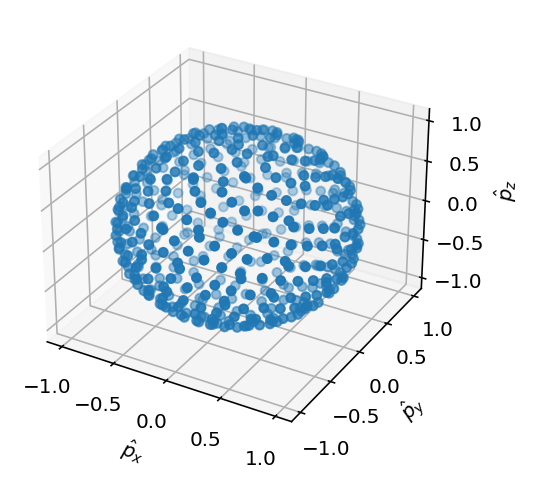

In [13]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

px, py, pz = P['px'], P['py'], P['pz']

p = np.sqrt(px**2 + py**2 + pz**2)

theta = np.arctan2(py, px)
phi = np.arccos(pz/p)
hist, pedges = np.histogram(phi, bins=100, density=True)
pcs = (pedges[1:] + pedges[:-1]) / 2

x = px/p
y = py/p
z = pz/p

ax.scatter(x[::200], y[::200], z[::200], '.');
ax.set_xlabel('$\hat{p}_x$')
ax.set_ylabel('$\hat{p}_y$')
ax.set_zlabel('$\hat{p}_z$')

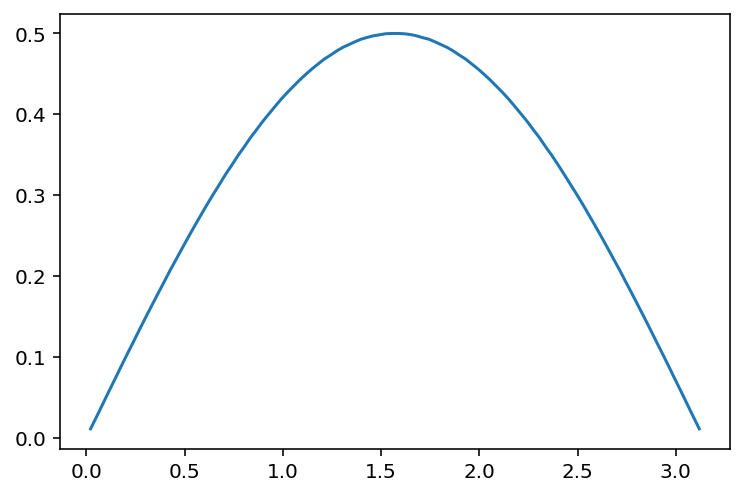

In [14]:
theta = np.arctan2(py, px)
phi = np.arccos(pz/p)
hist, pedges = np.histogram(phi, bins=100, density=True)
pcs = (pedges[1:] + pedges[:-1]) / 2

plt.plot(pcs, hist);

In [15]:
rns = np.random.random(100000)

In [16]:
pa = 0
pb = np.pi

Ca = np.cos(pa)
Cb = np.cos(pb)

In [17]:
rho = 1/(Ca-Cb)

In [18]:
phis = np.linspace(pa, pb, 1000)

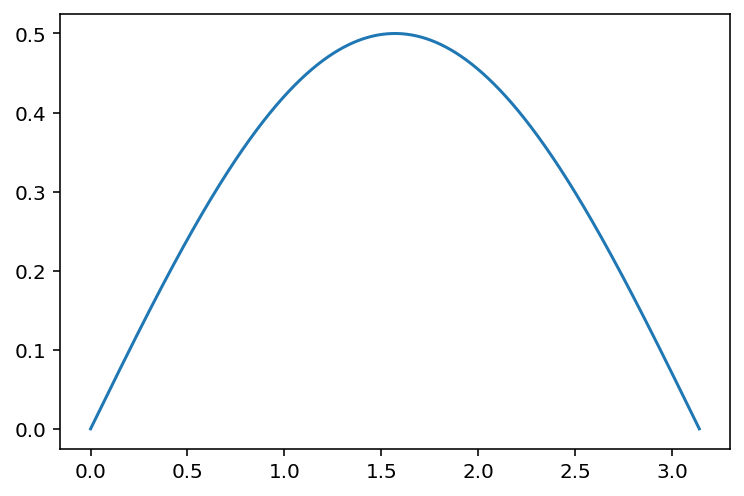

In [19]:
plt.plot(phis, rho*np.sin(phis));

In [20]:
np.trapz(rho*np.sin(phis), phis)

0.999999175885426

In [21]:
cdf = (Ca - np.cos(phis))*rho

In [22]:
from scipy.integrate import cumtrapz

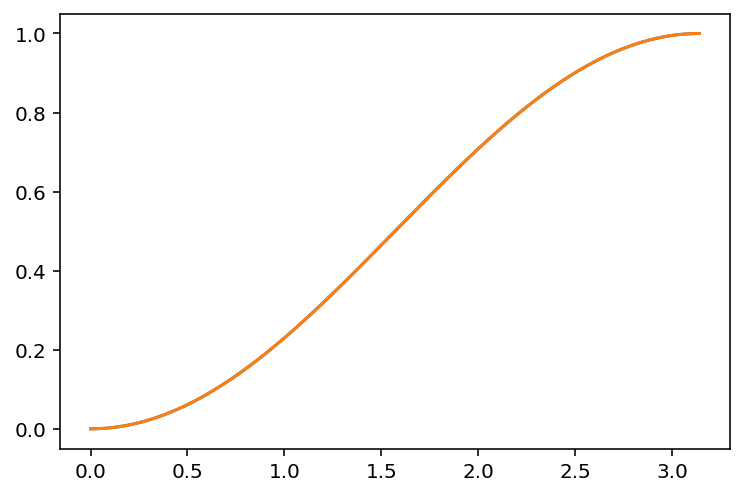

In [23]:
plt.plot(phis, cdf, phis, cumtrapz(rho*np.sin(phis), phis, initial=0));

In [24]:
ps = np.arccos( Ca - rns*(Ca-Cb) )

In [25]:
hist, pedges = np.histogram(ps, bins=30, density=True)

In [26]:
pcs = (pedges[1:] + pedges[:-1]) / 2

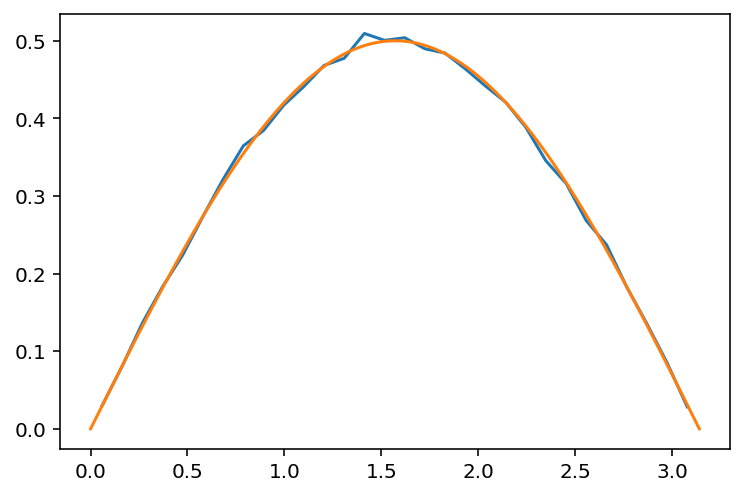

In [27]:
plt.plot(pcs, hist, phis, rho*np.sin(phis));

In [36]:
gen = Generator('data/beer.can.in.yaml', verbose=1)

#print(gen)

/Users/colwyngulliford/GitHub/distgen/distgen/generator.py:232: UserWarning: Input variable n_particle was a float, expected int.
  warnings.warn('Input variable n_particle was a float, expected int.')


In [37]:
P1 = gen.run()

Distribution format: gpt
Output file: beer.can.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 200000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 2 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -2.10539E-05 mm -> 0 mm
   Scaling sigma_x = 0.999982 mm -> 1 mm
   Shifting avg_y = -1.97648E-06 mm -> 0 mm
   Scaling sigma_y = 0.999998 mm -> 1 mm
   Shifting avg_px = -0.0212516 eV/c -> 0 eV/c
   Scaling sigma_px = 276.849 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.0259627 eV/c -> 0 eV/c
   Scaling sigma_py = 276.84

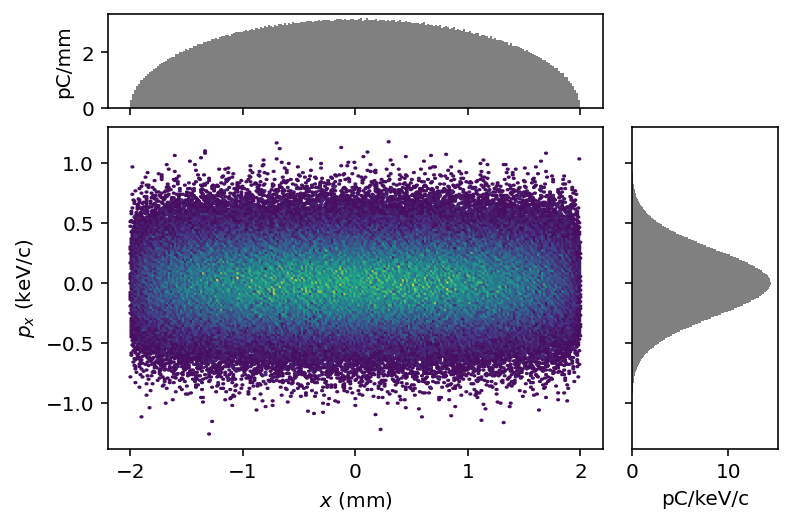

In [38]:
P1.plot('x', 'px')

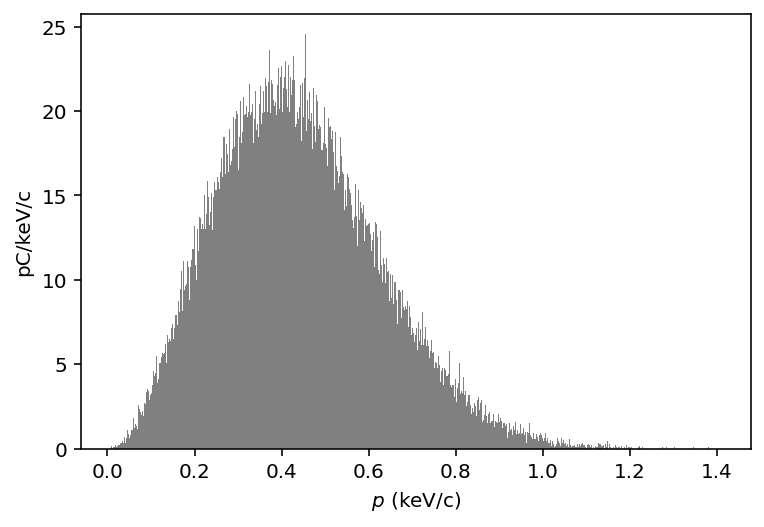

In [39]:
P1.plot('p')

In [40]:
P1.plot('pz')

In [41]:
P1['sigma_px'], P1['sigma_py'], P1['sigma_pz']

(276.8570795554991, 276.8570795554992, 166.88683722575215)

In [77]:
gen = Generator('data/maxwell_boltzmann.beer.can.in.yaml', verbose=1)

In [78]:
P2 = gen.run()

Distribution format: gpt
Output file: beer.can.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 200000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 2 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   p distribution: Maxwell-Boltzmann
      p scale = 276.857 eV/c
   azimuthal angle distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   polar angle distribution: uniform phi
      min_phi = 0 rad, max_phi = 3.14159 rad
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps
   Shifting avg_x = 1.63849E-05 mm -> 0 mm
   Scaling sigma_x = 0.999984 mm -> 1 mm
   Shifting avg_y = -2.77139E-06 mm -> 0 mm
   Scaling sigma_y = 0.999996 mm -> 1 mm
   Shifting avg_px = -0.000954618 eV/c -> -2.70524E-14 eV/c
   Scaling sigma_px = 276.853 eV/c -> 276.857 eV/c
   Shifting avg_py = 0.000856608 eV/c -> 0 

In [79]:
P2['sigma_px'], P2['sigma_py'], P2['sigma_pz']

(276.85707955549907, 276.85707955549907, 166.88083659251544)

In [80]:
gen = Generator('data/maxwell_boltzmann_KE.beer.can.in.yaml', verbose=1)

In [81]:
P3 = gen.run()

Distribution format: gpt
Output file: beer.can.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 200000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 2 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   KE distribution: Maxwell-Boltzmann Energy
      kT = 150 meV
   azimuthal angle distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   polar angle distribution: uniform phi
      min_phi = 0 rad, max_phi = 3.14159 rad
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps
   Shifting avg_x = 1.63849E-05 mm -> 0 mm
   Scaling sigma_x = 0.999984 mm -> 1 mm
   Shifting avg_y = -2.77139E-06 mm -> 0 mm
   Scaling sigma_y = 0.999996 mm -> 1 mm
   Shifting avg_px = -0.000526097 eV/c -> -2.7043E-14 eV/c
   Scaling sigma_px = 276.708 eV/c -> 276.7 eV/c
   Shifting avg_py = 0.00036565 eV/c -> 0 eV/c
 

In [82]:
P3.plot('kinetic_energy')

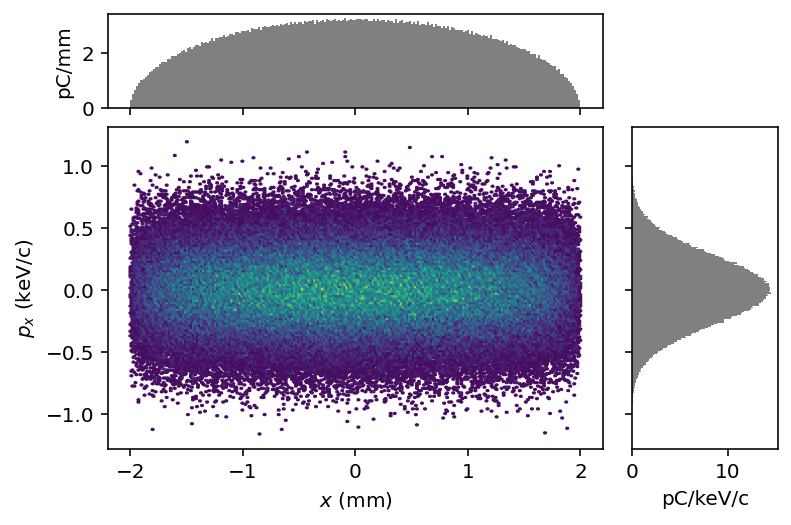

In [83]:
P3.plot('x', 'px')

In [86]:
P3['sigma_px'], P3['sigma_py'], P3['sigma_pz']

(276.7000087216931, 276.7000087216931, 166.72798635897524)

Text(0.5, 0, '$\\hat{p}_z$')

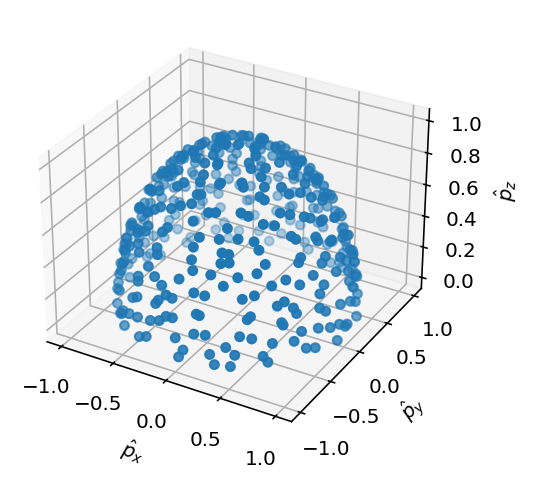

In [88]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

px, py, pz = P3['px'], P3['py'], P3['pz']

p = np.sqrt(px**2 + py**2 + pz**2)

theta = np.arctan2(py, px)
phi = np.arccos(pz/p)
hist, pedges = np.histogram(phi, bins=100, density=True)
pcs = (pedges[1:] + pedges[:-1]) / 2

x = px/p
y = py/p
z = pz/p

ax.scatter(x[::500], y[::500], z[::500], '.');
ax.set_xlabel('$\hat{p}_x$')
ax.set_ylabel('$\hat{p}_y$')
ax.set_zlabel('$\hat{p}_z$')

In [124]:
KE = np.linspace(0, 150, 10000)

E0=3.5

A1 = 0.8,
m1 = 8

A2 = 0.1
m2 = 90

PKE = A1*np.exp(-np.abs(KE-E0)/m1) + A2*np.exp(-np.abs(KE-E0)/m2) 
PKE = PKE/np.trapz(PKE, KE)  # Numerically intergate to normalize

plt.plot(KE, PKE);
plt.xlabel('KE (eV)');
plt.ylabel('$\\rho(KE)$ (1/eV)');

In [125]:
dat = np.zeros((len(KE),2))
dat[:,0], dat[:,1] = KE, PKE

np.savetxt('KEdist.txt', dat, header="KE     PKE", comments='')

In [674]:
q = 1000*1.60217663e-19

print(q)

input_yaml = """
n_particle: 1000
output: 
  file: test_simion_writer.ion
  type: simion
start: 
  type: cathode
random:
  type: hammersley
total_charge:
  units: C
  value: 1.60217663e-17
r_dist:
  max_r:
    units: mm
    value: 14.6
  type: radial_uniform
KE_dist:
  file: KEdist.txt
  units: eV
  type: file1d
transforms:
  sx:
    avg_x:
      units: millimeter
      value: -50
    type: set_avg x
  sy:
    avg_y:
      units: millimeter
      value: 50
    type: set_avg y
  sz:
    avg_z:
      units: millimeter
      value: 65
    type: set_avg z
"""

1.6021766299999998e-16


In [675]:
import yaml

inputs = yaml.safe_load(input_yaml)

n = 1000

inputs['n_particle'] = n
inputs['output']['file'] = 'test_ion_writer.ion'
inputs['output']['type'] = 'simion'
inputs['total_charge']['value'] = n*1.60217663e-19
inputs['transforms']['sx']['avg_x']['value'] = -50
inputs['transforms']['sy']['avg_y']['value'] = 50
inputs['transforms']['sz']['avg_z']['value'] = 55

In [676]:
gen = Generator(inputs, verbose=1)


In [677]:
P = gen.run()

Distribution format: simion
Output file: /Users/colwyngulliford/GitHub/distgen/docs/examples/test_ion_writer.ion

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1.60218E-16 C.
   Number of macroparticles: 1000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 14.6 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   KE distribution: KE-distribution file: "/Users/colwyngulliford/GitHub/distgen/docs/examples/KEdist.txt"
   azimuthal angle distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   polar angle distribution: uniform phi
      min_phi = 0 rad, max_phi = 3.14159 rad
   Shifting avg_x = 0.00564031 mm -> 0 mm
   Scaling sigma_x = 7.29551 mm -> 7.3 mm
   Shifting avg_y = 0.00120927 mm -> 0 mm
   Scaling sigma_y = 7.29741 mm -> 7.3 mm
   Shifting avg_px = -6.05715E-09 eV·s/m -> -9.5489E-22 eV·s/m
   Scaling sigma_px = 1.07391E-05 eV·s/m -> 1

In [678]:
P.plot('x', 'y', figsize=(5,5))

In [665]:
P.plot('x', 'px', figsize=(5,5))

In [666]:
P.plot('kinetic_energy')

In [717]:
from distgen.writers import writer

writer('simion', gen.beam(), 'test_ion_writer.ion', params={'color':0})

Distribution format: simion
Output file: /Users/colwyngulliford/GitHub/distgen/docs/examples/test_ion_writer.ion

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1.60218E-16 C.
   Number of macroparticles: 1000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 14.6 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   KE distribution: KE-distribution file: "/Users/colwyngulliford/GitHub/distgen/docs/examples/KEdist.txt"
   azimuthal angle distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   polar angle distribution: uniform phi
      min_phi = 0 rad, max_phi = 3.14159 rad
   Shifting avg_x = 0.00564031 mm -> 0 mm
   Scaling sigma_x = 7.29551 mm -> 7.3 mm
   Shifting avg_y = 0.00120927 mm -> 0 mm
   Scaling sigma_y = 7.29741 mm -> 7.3 mm
   Shifting avg_px = -6.05715E-09 eV·s/m -> -9.5489E-22 eV·s/m
   Scaling sigma_px = 1.07391E-05 eV·s/m -> 1

In [668]:
from scipy.constants import physical_constants

mc2 = 1e6 * physical_constants['electron mass energy equivalent in MeV'][0]
e_= physical_constants['elementary charge'][0]
me = physical_constants['electron mass in u'][0]

def particle_group_to_SIMION(P, filename, color=0):
    
    header=';0'
    
    simion_params= ['TOB', 'MASS', 'CHARGE', 'X', 'Y', 'Z', 'AZ', 'EL', 'KE', 'CWF', 'COLOR']
    
    simion_units = {'TOB':'usec', 'MASS':'amu', 'CHARGE':'e', 'X':'mm', 'Y':'mm', 'Z':'mm', 'AZ':'deg', 'EL':'deg', 'CWF':'', 'COLOR':''}
    
    data = np.zeros( (len(P), len(simion_params)) )
    
    data[:, simion_params.index('TOB')] = P.t*1e6    # [P.t] = sec, convert to usec
    
    if(P.species == 'electron'):
        data[:, simion_params.index('MASS')] = np.full(len(P), me)
        data[:, simion_params.index('CHARGE')] = np.full(len(P), -1)
    else:
        raise ValueError(f'Species {P.species} is not supported')
    
    data[:, simion_params.index('X')] =  P.z*1e3
    data[:, simion_params.index('Y')] =  P.y*1e3
    data[:, simion_params.index('Z')] = -P.x*1e3
    
    px =  P.pz
    py =  P.py
    pz = -P.px
    
    data[:, simion_params.index('KE')] = P.kinetic_energy       # [eV] 
    data[:, simion_params.index('AZ')] = np.arctan2(-pz, px) * (180/np.pi)   # [deg]
    data[:, simion_params.index('EL')] = np.arctan2(py, np.sqrt(px**2 + pz**2) ) * (180/np.pi) # [deg]
    
    data[:, simion_params.index('CWF')] = P.weight/e_                       # Charge Weighting Factor, derive from particle group weights
    data[:, simion_params.index('COLOR')] = np.full(len(P), color)
    #fname, X, fmt='%.18e', delimiter=' '
    
    np.savetxt(filename, data, delimiter=',', header=header, comments='', fmt='  %.9e')
    

In [669]:
particle_group_to_SIMION(P, 'text_ion_file.ion')

In [623]:
def read_simion_ION_file(filename):
    
    data = np.loadtxt(filename, comments=';', delimiter=',', skiprows=1)
    
    simion_params= ['TOB', 'MASS', 'CHARGE', 'X', 'Y', 'Z', 'AZ', 'EL', 'KE', 'CWF', 'COLOR']
    
    return {simion_params[ii]:data[:,ii] for ii, p in enumerate(simion_params)}
    
        
        

In [719]:
ions1 = read_simion_ION_file('text_ion_file.ion')
ions2 = read_simion_ION_file('test_ion_writer.ion')

Text(0.5, 0, '$\\hat{p}_z$')

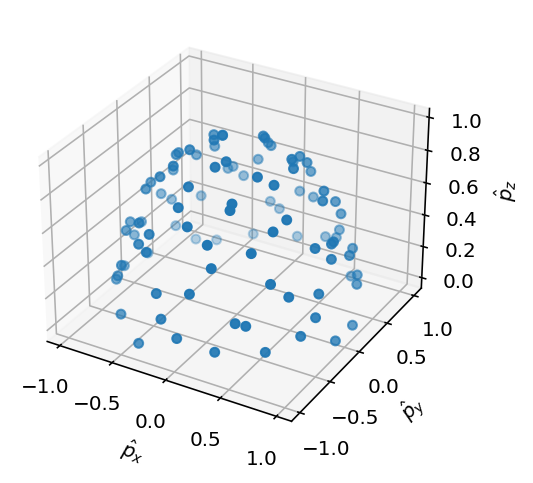

In [617]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

px, py, pz = P['px'], P['py'], P['pz']

p = np.sqrt(px**2 + py**2 + pz**2)

theta = np.arctan2(py, px)
phi = np.arccos(pz/p)
hist, pedges = np.histogram(phi, bins=100, density=True)
pcs = (pedges[1:] + pedges[:-1]) / 2

x = px/p
y = py/p
z = pz/p

ax.scatter(x[::], y[::], z[::], '.');
ax.set_xlabel('$\hat{p}_x$')
ax.set_ylabel('$\hat{p}_y$')
ax.set_zlabel('$\hat{p}_z$')

In [720]:
for p in ions1: print(f'{p}:', max(np.abs(ions1[p] - ions2[p])))

TOB: 0.0
MASS: 0.0
CHARGE: 0.0
X: 0.0
Y: 0.0
Z: 0.0
AZ: 0.0
EL: 0.0
KE: 9.99999905104687e-09
CWF: 0.0
COLOR: 0.0


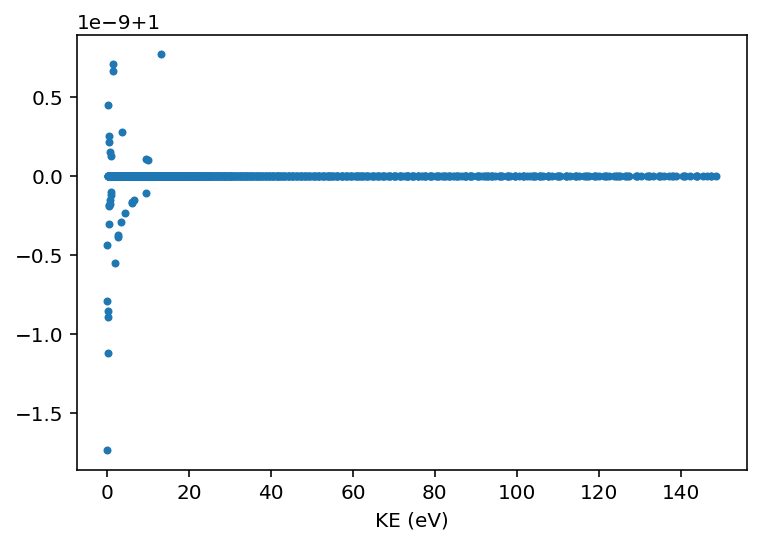

In [723]:
plt.plot(ions1['KE'], ions1['KE']/ions2['KE'], '.');
plt.xlabel('KE (eV)');

In [ ]:
#calc. data columns calc.
#eV scale x height y normaliz
1.25 1 3.4 0.85
2.5	2	3.45	0.8625
3.75	3	1.9	0.475
5	4	1.5	0.375
6.25	5	1.55	0.3875
7.5	6	10.5	2.625
8.75	7	9.5	2.375
11.25	9	8.5	2.125
12.5	10	6.5	1.625
18.75	15	6	1.5
25	20	4.5	1.125
31.25	25	4	1
37.5	30	3.5	0.875
62.5	50	3	0.75
75	60	2	0.5
100	80	1	0.25

In [724]:
KE = [1.25, 2.5, 3.75, 5, 6.25, 7.5, 8.75, 11.25, 12.5, 18.75, 25, 31.25, 37.5, 62.5, 75, 100]
rho = [1, 3.45, 3, 1.5, 5, 10.5, 7, 9, 10, 15]